[[4.7 3.2 1.3 0.2]
 [6.6 2.9 4.6 1.3]
 [7.3 2.9 6.3 1.8]]


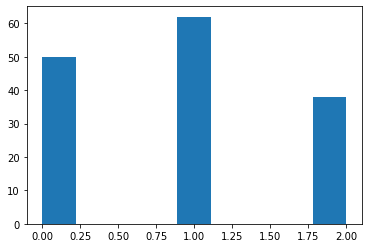

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data= pd.read_csv("iris.data")
y = data.iloc[:,4:5]
y = y.to_numpy()
data =  data.iloc[:,:4]

data_lista = data.to_numpy()
indexes = list(data.index)
cond = 10
distancia_mais_proximo = []
lista_medias = []

def pegar_centroides(num): #pega tres centroides aleatorios 
    index = [2,58,107]
    #index = np.random.choice(indexes,num)
    lista_centroides = (data.iloc[index].to_numpy())
    return lista_centroides
#  


def calcular_distancia(lista_centroides):
    lista_distancia = []
    for centroide in lista_centroides:
        lista_distancias_centroide =[]
        for celula in data_lista:
            dist = 0
            for i in range(len(celula)):
                dist =  dist + (celula[i]-centroide[i])**2
                if i == len(celula)-1:
                    dist = dist**(0.5)
            lista_distancias_centroide.append(dist)
        lista_distancia.append(lista_distancias_centroide)
    return lista_distancia
       
        
def classificar_grupos(lista_distancia): #ver a distancia minima e classifica pelo indice da lista
    lista_classificacao_centroides = []
    medias =[]
    for i in range(len(data_lista)):
        cents = [lista_distancia[0][i],lista_distancia[1][i],lista_distancia[2][i]]
        min_dist = min(cents)
        medias.append(min_dist)
        distancia_mais_proximo.append(min_dist)
        classe_centroide = cents.index(min_dist)
        lista_classificacao_centroides.append(classe_centroide)
    lista_medias.append(np.mean(medias))
    return lista_classificacao_centroides
        

def pegar_novos_centroides_3(lista_classificacao_centroides):
    count0 = 0
    count1  = 0
    count2 = 0
    novos_centroides = [[0,0,0,0] for item in range(3)]
    for i in range(len(lista_classificacao_centroides)): #somando centroides
        ind_cent = 0
        if lista_classificacao_centroides[i] == 0:
            count0 = count0 + 1
            for k in range(len(novos_centroides[ind_cent])):
                novos_centroides[0][k] = novos_centroides[0][k] + data_lista[i][k]
        if lista_classificacao_centroides[i] == 1:
            count1 = count1 + 1
            for k in range(len(novos_centroides[ind_cent])):
                novos_centroides[1][k] = novos_centroides[1][k] + data_lista[i][k]
        if lista_classificacao_centroides[i] == 2:
            count2 = count2 + 1
            for k in range(len(novos_centroides[ind_cent])):
                novos_centroides[2][k] = novos_centroides[2][k] + data_lista[i][k]
       # print("novos centrides " + str(novos_centroides)+ "\n")
        #print ("contadores " + str(count0)+"  " + str(count1)+"  " + str(count2)+" \n ")
               
    for i in range(len(novos_centroides)): #dividindo centreides pelo numero de itens na categoria  
        for k in range(len(novos_centroides[i])):
            if i == 0:
                if count0 > 0 :
                    novos_centroides[i][k] = novos_centroides[i][k]/count0
                else:
                    novos_centroides[i][k] = 0
            if i == 1:
                
                if count1 > 0 :
                    novos_centroides[i][k] = novos_centroides[i][k]/count1
                else:
                    novos_centroides[i][k] = 0
            if i == 2:
                if count2 > 0 :
                    novos_centroides[i][k] = novos_centroides[i][k]/count2
                else:
                    novos_centroides[i][k] = 0
        #print("novos centrides " + str(novos_centroides)+ "\n")
    
    return novos_centroides


lista_centroides = pegar_centroides(3)
lista_distancia = calcular_distancia(lista_centroides)
lista_classificacao_centroides = classificar_grupos(lista_distancia)
novos_centroides = pegar_novos_centroides_3(lista_classificacao_centroides)

def k_means():
    lista_grupos_antiga = []
    lista_grupos_nova = []
    lista_centroides =[]
    lista_centroides = pegar_centroides(3)
    cont  = 0
    print(lista_centroides)
    
    while (cond > 0):
        cont = cont + 1
        
        lista_distancia = calcular_distancia(lista_centroides)
        lista_classificacao_centroides = classificar_grupos(lista_distancia)
        novos_centroides = pegar_novos_centroides_3(lista_classificacao_centroides)
        lista_grupos_nova = lista_classificacao_centroides
        if lista_grupos_nova != lista_grupos_antiga:
            lista_grupos_antiga = lista_grupos_nova
        else:
            return lista_classificacao_centroides
        lista_centroides = novos_centroides
        
lista_classificacao_centroides = k_means()
plt.hist(lista_classificacao_centroides, bins='auto') 

desvio_padrao = np.std(distancia_mais_proximo)
histogarma =[[],[],[]]
for i in range(len(lista_classificacao_centroides)):
    if lista_classificacao_centroides[i] == 0:
        if y[i] == 'Iris-setosa':
            histogarma[0].append(0)
        if y[i] == 'Iris-versicolor':
            histogarma[0].append(1)
        if y[i] == 'Iris-virginica':
            histogarma[0].append(2)
    if lista_classificacao_centroides[i] == 1:
        if y[i] == 'Iris-setosa':
            histogarma[1].append(0)
        if y[i] == 'Iris-versicolor':
            histogarma[1].append(1)
        if y[i] == 'Iris-virginica':
            histogarma[1].append(2)
    if lista_classificacao_centroides[i] == 2:
        if y[i] == 'Iris-setosa':
            histogarma[2].append(0)
        if y[i] == 'Iris-versicolor':
            histogarma[2].append(1)
        if y[i] == 'Iris-virginica':
            histogarma[2].append(2)

Text(0.5, 0, 'classes')

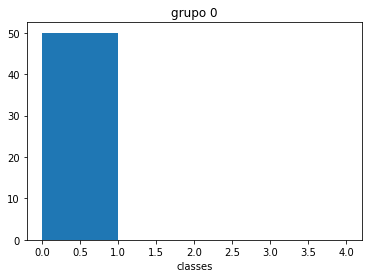

In [16]:
plt.hist(histogarma[0], bins=[0,1, 2, 3, 4])   
plt.title("grupo 0")
plt.xlabel('classes')

Text(0.5, 0, 'classes')

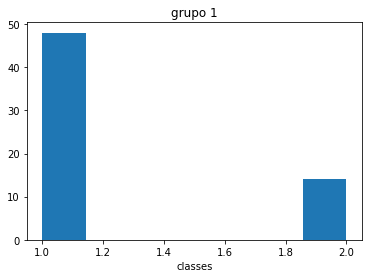

In [17]:
plt.hist(histogarma[1], bins='auto')       
plt.title("grupo 1")
plt.xlabel('classes')

Text(0.5, 0, 'classes')

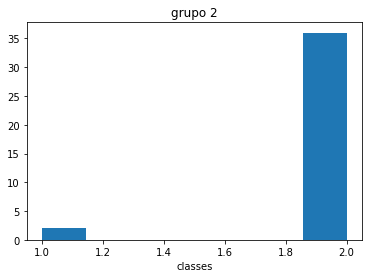

In [18]:
plt.hist(histogarma[2], bins='auto')  
plt.title("grupo 2")
plt.xlabel('classes')
